<a href="https://colab.research.google.com/github/oskrtrom/oskrtrom.github.io/blob/main/Datos2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Ruta al archivo CSV
ruta_archivo = 'earthquake data.csv'

# Cargar el archivo CSV en un DataFrame de pandas
datos_sismicos = pd.read_csv(ruta_archivo)

# Verificar las primeras filas del DataFrame
print(datos_sismicos.head())

# Parseo de fechas y establecimiento como índice
datos_sismicos['Date & Time'] = pd.to_datetime(datos_sismicos['Date & Time'])
datos_sismicos.set_index('Date & Time', inplace=True)

# Verificar las primeras filas del DataFrame después del procesamiento
print(datos_sismicos.head())


        Date & Time  Latitude  Longitude  Depth  Magnitude     Lands  \
0  11/21/2023 17:43    31.592   -104.549      3        2.7   WESTERN   
1  11/21/2023 17:31   -24.200    -67.580    198        4.0    SALTA,   
2  11/21/2023 17:27    31.647   -104.017      5        2.9   WESTERN   
3  11/21/2023 17:01    46.345     13.601      0        0.8  SLOVENIA   
4  11/21/2023 16:56    -4.320    130.810     10        3.3     BANDA   

     Country  
0      TEXAS  
1  ARGENTINA  
2      TEXAS  
3   SLOVENIA  
4        SEA  
                     Latitude  Longitude  Depth  Magnitude     Lands  \
Date & Time                                                            
2023-11-21 17:43:00    31.592   -104.549      3        2.7   WESTERN   
2023-11-21 17:31:00   -24.200    -67.580    198        4.0    SALTA,   
2023-11-21 17:27:00    31.647   -104.017      5        2.9   WESTERN   
2023-11-21 17:01:00    46.345     13.601      0        0.8  SLOVENIA   
2023-11-21 16:56:00    -4.320    130.810     

In [3]:
import pandas as pd

# Ruta al archivo CSV
ruta_archivo = 'earthquake data.csv'

# Cargar el archivo CSV en un DataFrame de pandas
datos_sismicos = pd.read_csv(ruta_archivo)

# Parseo de fechas y establecimiento como índice
datos_sismicos['Date & Time'] = pd.to_datetime(datos_sismicos['Date & Time'])
datos_sismicos.set_index('Date & Time', inplace=True)


In [4]:
# Exploración de datos
print(datos_sismicos.info())
print(datos_sismicos.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53539 entries, 2023-11-21 17:43:00 to 2023-05-14 09:27:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   53539 non-null  float64
 1   Longitude  53539 non-null  float64
 2   Depth      53539 non-null  int64  
 3   Magnitude  53539 non-null  float64
 4   Lands      53539 non-null  object 
 5   Country    53539 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.9+ MB
None
           Latitude     Longitude         Depth     Magnitude
count  53539.000000  53539.000000  53539.000000  53539.000000
mean      21.120630    -15.421862     35.799959      2.962569
std       25.645429     93.129891     67.580186      0.893910
min      -65.899000   -179.992000     -4.000000     -0.700000
25%        8.485000    -94.570000      6.000000      2.300000
50%       29.320000     -8.373000     10.000000      2.900000
75%       38.470000     37.460000   

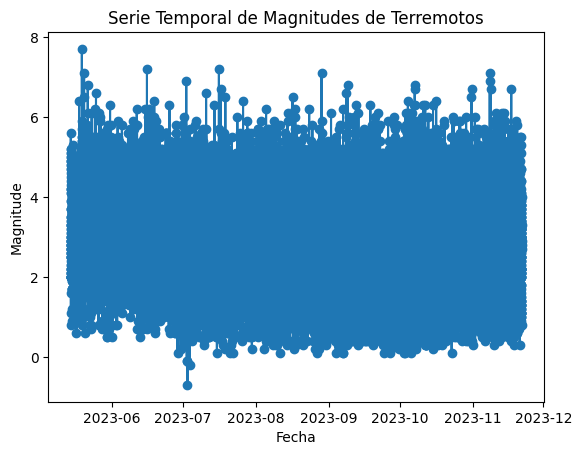

In [8]:
import matplotlib.pyplot as plt

# Gráfico de series temporales
plt.plot(datos_sismicos.index, datos_sismicos['Magnitude'], marker='o')
plt.title('Serie Temporal de Magnitudes de Terremotos')
plt.xlabel('Fecha')
plt.ylabel('Magnitude')
plt.show()


In [10]:
# Manejo de datos atípicos
datos_sismicos_sin_atipicos = datos_sismicos[(datos_sismicos['Magnitude'] > 3.0) & (datos_sismicos['Magnitude'] < 9.0)]


In [11]:
# Selección de características relevantes
caracteristicas_seleccionadas = ['Magnitude', 'Depth', 'Latitude', 'Longitude']
datos_sismicos_seleccionados = datos_sismicos_sin_atipicos[caracteristicas_seleccionadas]


In [12]:
# Identificación de datos faltantes
datos_faltantes = datos_sismicos_seleccionados.isnull().sum()


In [13]:
# Imputación de datos usando la mediana
datos_sismicos_imputados = datos_sismicos_seleccionados.fillna(datos_sismicos_seleccionados.median())


In [14]:
# Evaluación del impacto
estadisticas_despues_imputacion = datos_sismicos_imputados.describe()


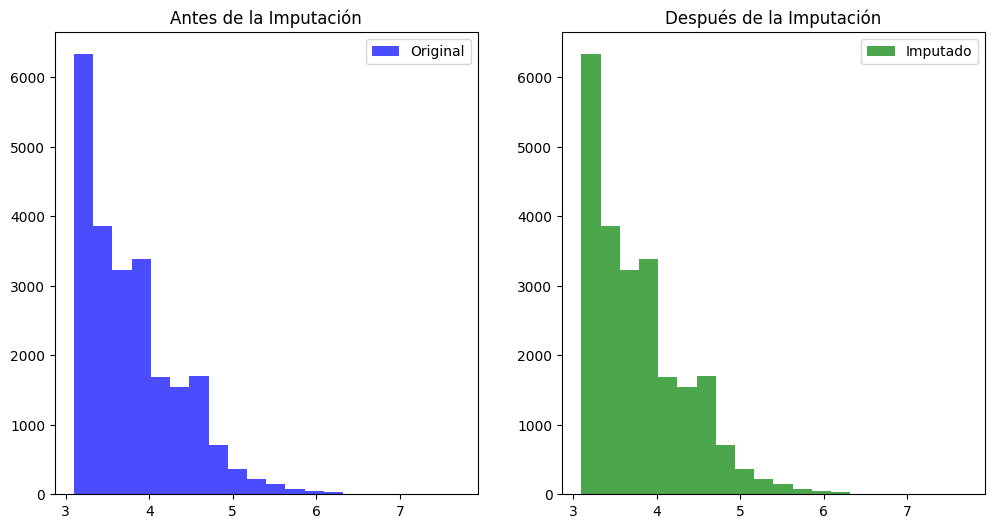

In [19]:
# Visualización comparativa antes y después de la imputación
plt.figure(figsize=(12, 6))

# Gráfico antes de la imputación
plt.subplot(1, 2, 1)
plt.title('Antes de la Imputación')
plt.hist(datos_sismicos_seleccionados['Magnitude'].dropna(), bins=20, color='blue', alpha=0.7, label='Original')
plt.legend()

# Gráfico después de la imputación
plt.subplot(1, 2, 2)
plt.title('Después de la Imputación')
plt.hist(datos_sismicos_imputados['Magnitude'], bins=20, color='green', alpha=0.7, label='Imputado')
plt.legend()

plt.show()


Error cuadrático medio (MSE): 0.321699256889354


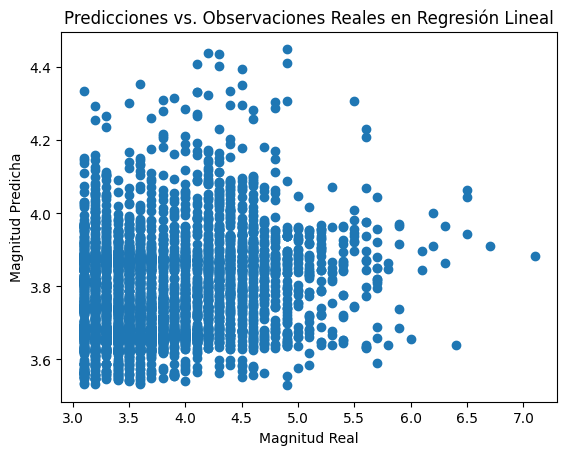

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que 'datos_sismicos_imputados' es tu DataFrame con los datos imputados
# y 'Magnitud' es la variable que deseas predecir.

# División de datos en conjuntos de entrenamiento y prueba
X = datos_sismicos_imputados[['Depth', 'Latitude', 'Longitude']]
y = datos_sismicos_imputados['Magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización y entrenamiento del modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
predicciones = modelo_regresion_lineal.predict(X_test)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, predicciones)
print(f"Error cuadrático medio (MSE): {mse}")

# Visualización de las predicciones vs. observaciones reales
plt.scatter(y_test, predicciones)
plt.xlabel('Magnitud Real')
plt.ylabel('Magnitud Predicha')
plt.title('Predicciones vs. Observaciones Reales en Regresión Lineal')
plt.show()


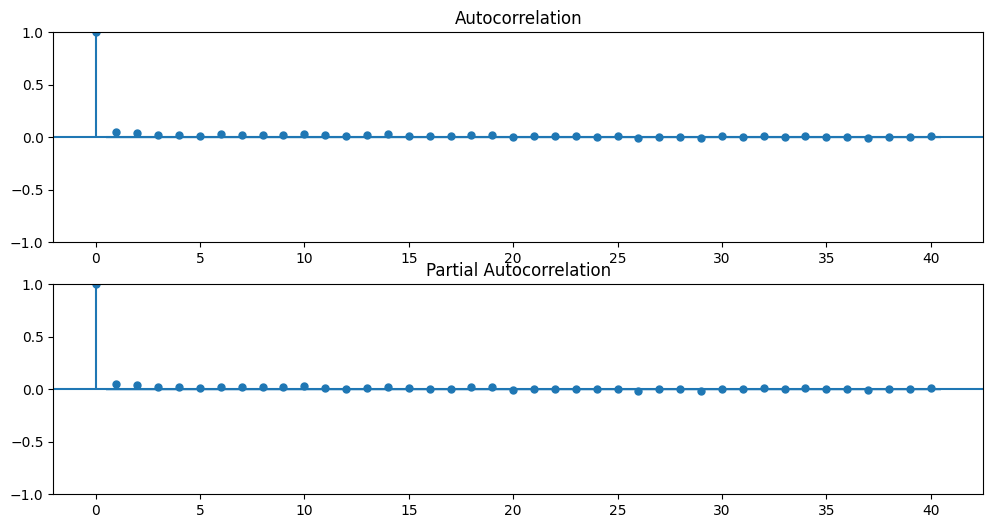

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:              Magnitude   No. Observations:                23346
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -20311.869
Date:                Sun, 17 Dec 2023   AIC                          40631.737
Time:                        19:11:46   BIC                          40663.970
Sample:                             0   HQIC                         40642.204
                              - 23346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0365      0.006      5.959      0.000       0.025       0.049
ar.L2          0.0333      0.006      5.425      0.000       0.021       0.045
ma.L1         -0.9947      0.001  -1569.388      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


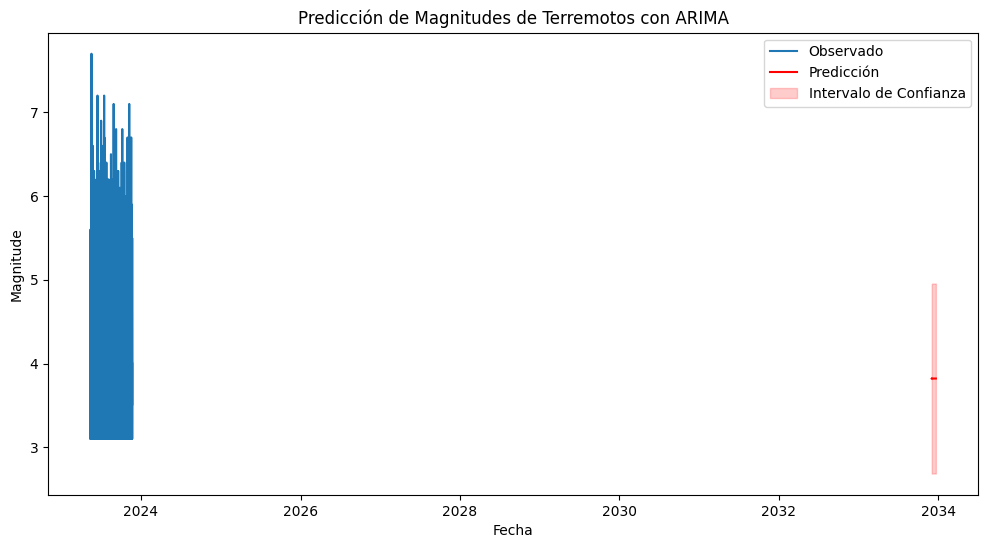

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supongamos que 'datos_sismicos_imputados' es tu DataFrame con los datos imputados
# y 'Magnitud' es la serie temporal que deseas analizar.

# Visualización de la ACF y PACF para determinar los parámetros de ARIMA
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(datos_sismicos_imputados['Magnitude'], ax=plt.gca(), lags=40)
plt.subplot(2, 1, 2)
plot_pacf(datos_sismicos_imputados['Magnitude'], ax=plt.gca(), lags=40)
plt.show()

# Ajuste automático del modelo ARIMA
modelo_arima = ARIMA(datos_sismicos_imputados['Magnitude'], order=(2, 1, 1))
resultado_arima = modelo_arima.fit()

# Visualización de los resultados
print(resultado_arima.summary())

# Obtención de predicciones
predicciones = resultado_arima.get_forecast(steps=20)
intervalo_confianza = predicciones.conf_int()

# Visualizar la serie temporal y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(datos_sismicos_imputados['Magnitude'], label='Observado')
plt.plot(predicciones.predicted_mean, color='red', label='Predicción')
plt.fill_between(intervalo_confianza.index,
                 intervalo_confianza.iloc[:, 0],
                 intervalo_confianza.iloc[:, 1], color='red', alpha=0.2, label='Intervalo de Confianza')

plt.title('Predicción de Magnitudes de Terremotos con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


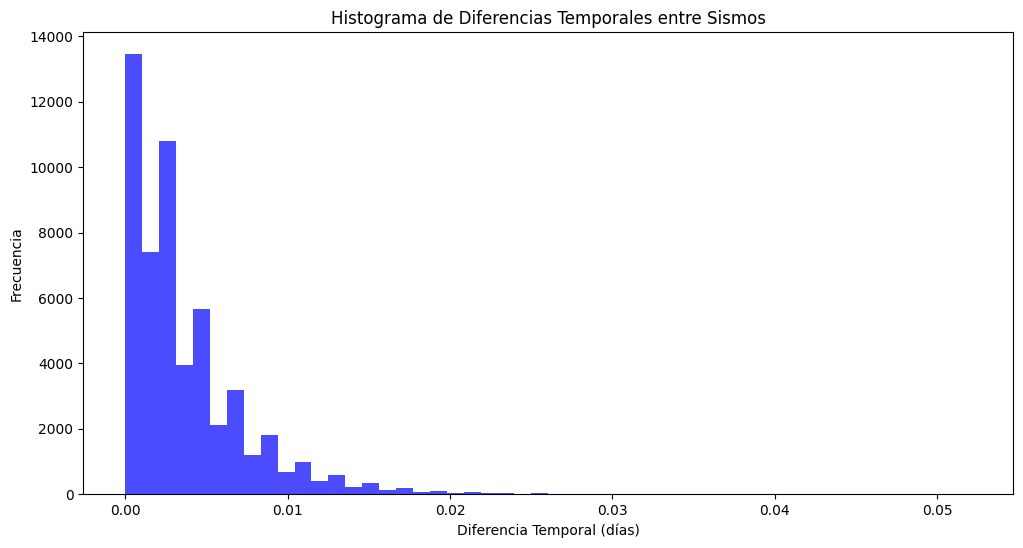

Autocorrelación de las diferencias temporales: 0.03926263881199099


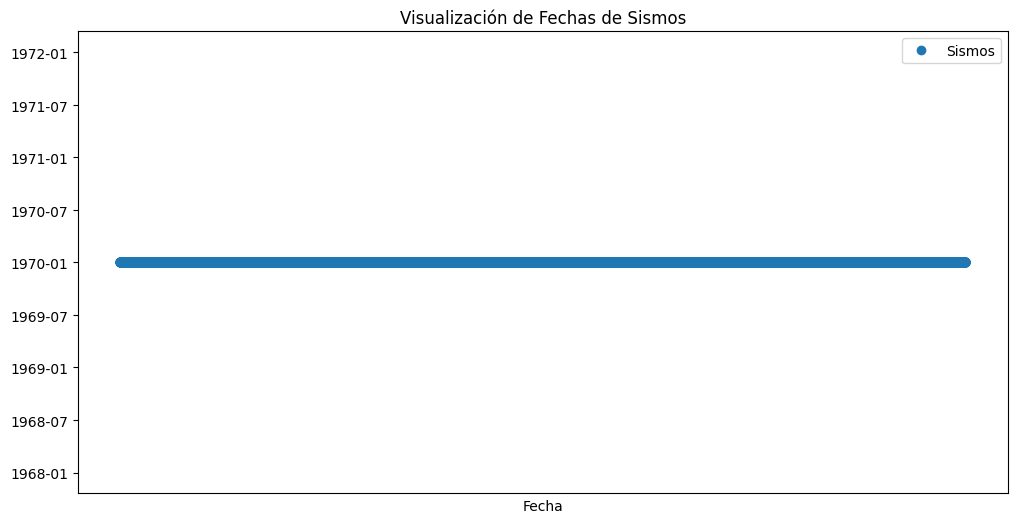

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO

# Leer el archivo CSV que ya está en Colab
ruta_archivo = 'earthquake data.csv'  # Reemplaza con la ruta correcta
datos_sismicos = pd.read_csv(ruta_archivo)

# Convertir la columna de fechas a formato datetime si aún no está en ese formato
datos_sismicos['Date & Time'] = pd.to_datetime(datos_sismicos['Date & Time'])

# Ordenar los datos por fecha
datos_sismicos.sort_values(by='Date & Time', inplace=True)

# Calcular las diferencias entre fechas consecutivas
diferencias_temporales = datos_sismicos['Date & Time'].diff()

# Convertir las diferencias temporales a días (o la unidad que prefieras)
diferencias_temporales_dias = diferencias_temporales / np.timedelta64(1, 'D')

# Histograma de las diferencias temporales convertidas
plt.figure(figsize=(12, 6))
plt.hist(diferencias_temporales_dias.dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Diferencias Temporales entre Sismos')
plt.xlabel('Diferencia Temporal (días)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de autocorrelación
autocorrelacion = diferencias_temporales_dias.autocorr()
print(f"Autocorrelación de las diferencias temporales: {autocorrelacion}")

# Visualización de fechas para detectar patrones visuales
plt.figure(figsize=(12, 6))
plt.plot(datos_sismicos['Date & Time'], np.zeros_like(datos_sismicos['Date & Time']), 'o', label='Sismos')
plt.title('Visualización de Fechas de Sismos')
plt.xlabel('Fecha')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.show()

